In [1]:
using Random, Distributions, Plots

In [2]:
function metropolis(target, proposal, M, burn_in)
    # Initializing the sample vector
    samples = Vector{Union{Missing,Float64}}(missing,M+burn_in)
    
    # Setting a zeroth sample value
    x = rand(Normal(0,10))
    
    # Anonymous function for transition probability
    dens = (x,y)-> (target(y)/target(x))*(pdf.(proposal(y),x)/pdf.(proposal(x),y))
    
    # Generate M+burn_in samples
    for i = 1:(M+burn_in)
        y = rand(proposal(x))
        
        # Only accept with probability min(1,dens(x,y))
        if rand() < min(1,dens(x,y))
           x = y
        end
        samples[i] = x
    end
    
    # Return only the samples after burn_in
    return samples[burn_in + 1:M+burn_in]
end

metropolis (generic function with 1 method)

In [3]:
target = x -> pdf.(Normal(100,100), x)
proposal = t -> Normal(t,100)

#7 (generic function with 1 method)

In [6]:
samples = metropolis(target, proposal, 100000,100)

100000-element Array{Union{Missing, Float64},1}:
  34.97857805922925 
  34.97857805922925 
  34.97857805922925 
  29.31589587479885 
  29.31589587479885 
  86.2029969303162  
  86.2029969303162  
  86.2029969303162  
 214.69826707408734 
 161.27299786636934 
 181.38827457594152 
 181.38827457594152 
 165.3389513619154  
   ⋮                
  72.77066163940981 
 137.9384661943321  
  50.204993299574994
 124.06595270298041 
 124.06595270298041 
  58.761947530152966
  58.761947530152966
 235.3413987549659  
 235.3413987549659  
 228.34917487280168 
 237.28390294481596 
 237.28390294481596 

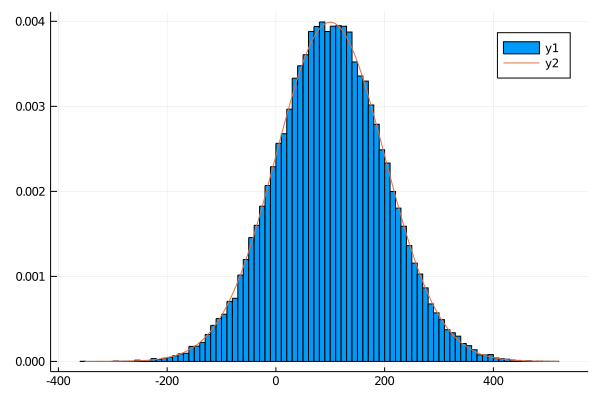

In [7]:
x = range(minimum(samples), length = 300, stop = maximum(samples))
histogram(samples, normed = true)
plot!(x, target)